In [1]:
import pandas as pd  # 文字数を節約
%matplotlib inline 
# グラフ描画のための呪文

# 全部表示させる
pd.options.display.max_colwidth = None
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.6f}'.format

In [2]:
naked_df = pd.read_csv("nakedNTA.csv" # csvファイルのパス
                 # sep="\t", # tabをseparator
                 # encoding="iso8859-1", # encode
                # na_values=[0])
                # parse_dates=['Treatment_Date']) # None 
                      )


In [3]:
naked_df.head()

,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,PUMA,Shape_Leng,Shape_Area
0,1.000000,1,Manhattan,100,1000100,NaN,The Battery-Governors Island-Ellis Island-Liberty Island,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000100,4121,10833.043929,1843004.522410
1,2.010000,1,Manhattan,201,1000201,NaN,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000201,4103,4754.495247,972312.140355
2,6.000000,1,Manhattan,600,1000600,NaN,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000600,4103,6976.286215,2582705.157460
3,14.010000,1,Manhattan,1401,1001401,NaN,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001401,4103,5075.332000,1006116.584290
4,14.020000,1,Manhattan,1402,1001402,NaN,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001402,4103,4459.156019,1226206.247190


In [4]:
naked_df.nunique(dropna=False)

CTLabel       1530
BoroCode         5
BoroName         5
CT2020        1530
BoroCT2020    2325
CDEligibil       1
NTAName        262
NTA2020        262
CDTA2020        71
CDTANAME        71
GEOID         2325
PUMA            55
Shape_Leng    2325
Shape_Area    2325
dtype: int64

In [5]:
naked_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CTLabel     2325 non-null   float64
 1   BoroCode    2325 non-null   int64  
 2   BoroName    2325 non-null   object 
 3   CT2020      2325 non-null   int64  
 4   BoroCT2020  2325 non-null   int64  
 5   CDEligibil  0 non-null      float64
 6   NTAName     2325 non-null   object 
 7   NTA2020     2325 non-null   object 
 8   CDTA2020    2325 non-null   object 
 9   CDTANAME    2325 non-null   object 
 10  GEOID       2325 non-null   int64  
 11  PUMA        2325 non-null   int64  
 12  Shape_Leng  2325 non-null   float64
 13  Shape_Area  2325 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 254.4+ KB


In [6]:
# Only readDepAreaだけ読み込む
columns_to_read = ['GEOID', 'DepArea']

deprived_df = pd.read_csv("QGIS/DeprivedAreawithNTA.csv", # csvファイルのパス
                 # sep="\t", # tabをseparator
                 # encoding="iso8859-1", # encode
                # na_values=[0])
                # parse_dates=['Treatment_Date']) # None 
                usecols=columns_to_read)

deprived_df.head()

,GEOID,DepArea
0,36061000201,862548.445000
1,36061000600,2575010.925000
2,36061001401,1006116.584000
3,36061001402,1226206.247000
4,36061001800,1668319.823000


In [7]:
merged_df = naked_df.merge(deprived_df, how='outer', on='GEOID')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CTLabel     2325 non-null   float64
 1   BoroCode    2325 non-null   int64  
 2   BoroName    2325 non-null   object 
 3   CT2020      2325 non-null   int64  
 4   BoroCT2020  2325 non-null   int64  
 5   CDEligibil  0 non-null      float64
 6   NTAName     2325 non-null   object 
 7   NTA2020     2325 non-null   object 
 8   CDTA2020    2325 non-null   object 
 9   CDTANAME    2325 non-null   object 
 10  GEOID       2325 non-null   int64  
 11  PUMA        2325 non-null   int64  
 12  Shape_Leng  2325 non-null   float64
 13  Shape_Area  2325 non-null   float64
 14  DepArea     1325 non-null   float64
dtypes: float64(5), int64(5), object(5)
memory usage: 272.6+ KB


In [8]:
merged_df.head()

,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,PUMA,Shape_Leng,Shape_Area,DepArea
0,1.000000,2,Bronx,100,2000100,NaN,Rikers Island,QN0151,QN01,QN01 Astoria-Queensbridge (CD 1 Equivalent),36005000100,4221,18897.487875,18163734.866300,NaN
1,2.000000,2,Bronx,200,2000200,NaN,Soundview-Clason Point,BX0902,BX09,BX09 Soundview-Parkchester (CD 9 Approximation),36005000200,4209,15251.735414,4877012.542360,NaN
2,4.000000,2,Bronx,400,2000400,NaN,Soundview-Clason Point,BX0902,BX09,BX09 Soundview-Parkchester (CD 9 Approximation),36005000400,4209,24785.525725,8557952.854980,NaN
3,16.000000,2,Bronx,1600,2001600,NaN,Soundview-Clason Point,BX0902,BX09,BX09 Soundview-Parkchester (CD 9 Approximation),36005001600,4209,9671.306415,5221330.108290,NaN
4,19.010000,2,Bronx,1901,2001901,NaN,Mott Haven-Port Morris,BX0101,BX01,BX01 Melrose-Mott Haven-Port Morris (CD 1 Approximation),36005001901,4221,6151.012574,2232573.691740,1715433.235000


In [9]:
columns_to_read = ['GEOID', 'NormalArea']
normalwalk_df = pd.read_csv("QGIS/10minWalkwithNTA.csv", # csvファイルのパス
                 # sep="\t", # tabをseparator
                 # encoding="iso8859-1", # encode
                usecols=columns_to_read)
                # parse_dates=['Treatment_Date']) # None 

normalwalk_df.head()

,GEOID,NormalArea
0,36061000201,862548.445000
1,36061000600,2575010.925000
2,36061001401,1006116.584000
3,36061001402,1226206.247000
4,36061001800,2399276.864000


In [10]:
merged_df = merged_df.merge(normalwalk_df, how='outer', on='GEOID')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CTLabel     2325 non-null   float64
 1   BoroCode    2325 non-null   int64  
 2   BoroName    2325 non-null   object 
 3   CT2020      2325 non-null   int64  
 4   BoroCT2020  2325 non-null   int64  
 5   CDEligibil  0 non-null      float64
 6   NTAName     2325 non-null   object 
 7   NTA2020     2325 non-null   object 
 8   CDTA2020    2325 non-null   object 
 9   CDTANAME    2325 non-null   object 
 10  GEOID       2325 non-null   int64  
 11  PUMA        2325 non-null   int64  
 12  Shape_Leng  2325 non-null   float64
 13  Shape_Area  2325 non-null   float64
 14  DepArea     1325 non-null   float64
 15  NormalArea  1640 non-null   float64
dtypes: float64(6), int64(5), object(5)
memory usage: 290.8+ KB


In [11]:
columns_to_read = ['GEOID', 'ElevatorArea']
elevatorwalk_df = pd.read_csv("10minElevatorwithNTA.csv", # csvファイルのパス
                 # sep="\t", # tabをseparator
                 # encoding="iso8859-1", # encode
                usecols=columns_to_read)
                # parse_dates=['Treatment_Date']) # None 

elevatorwalk_df.head()

,GEOID,ElevatorArea
0,36061001800,730957.041000
1,36061002602,51614.168000
2,36061002800,1281014.078000
3,36061003100,2207029.493000
4,36061003200,1519123.755000


In [12]:
merged_df = merged_df.merge(elevatorwalk_df, how='outer', on='GEOID')


In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CTLabel       2325 non-null   float64
 1   BoroCode      2325 non-null   int64  
 2   BoroName      2325 non-null   object 
 3   CT2020        2325 non-null   int64  
 4   BoroCT2020    2325 non-null   int64  
 5   CDEligibil    0 non-null      float64
 6   NTAName       2325 non-null   object 
 7   NTA2020       2325 non-null   object 
 8   CDTA2020      2325 non-null   object 
 9   CDTANAME      2325 non-null   object 
 10  GEOID         2325 non-null   int64  
 11  PUMA          2325 non-null   int64  
 12  Shape_Leng    2325 non-null   float64
 13  Shape_Area    2325 non-null   float64
 14  DepArea       1325 non-null   float64
 15  NormalArea    1640 non-null   float64
 16  ElevatorArea  1112 non-null   float64
dtypes: float64(7), int64(5), object(5)
memory usage: 308.9+ KB


In [14]:
# For later merge, make geoid object
merged_df['GEOID'] = merged_df['GEOID'].astype(str)

# Sucessesful in merging DepArea and NoramlArea
Now, try making a function to merge census data

In [15]:
def to_merged_df(df):
    global merged_df
    df['GEOID'] = df['GEO_ID'].astype(str).str.extract(r'1400000US(\d+)')
    merged_df = pd.merge(merged_df, df, on='GEOID', how='outer') # In case of error handling, use outer join
    return

# Now, test Povery data

In [16]:
temp_text ='''GEO_ID
S1701_C01_001E
S1701_C01_013E
S1701_C01_014E
S1701_C01_015E
S1701_C01_016E
S1701_C01_017E
S1701_C01_018E
S1701_C01_019E
S1701_C01_020E
S1701_C01_021E
S1701_C01_022E
S1701_C01_023E
S1701_C01_024E
S1701_C01_025E
S1701_C01_026E
S1701_C01_038E
S1701_C01_039E
S1701_C01_040E
S1701_C01_041E
S1701_C01_042E
S1701_C01_043E
S1701_C01_044E
S1701_C01_045E
S1701_C02_001E
S1701_C02_013E
S1701_C02_014E
S1701_C02_015E
S1701_C02_016E
S1701_C02_017E
S1701_C02_018E
S1701_C02_019E
S1701_C02_020E
S1701_C02_021E
S1701_C02_022E
S1701_C02_023E
S1701_C02_024E
S1701_C02_025E
S1701_C02_026E
S1701_C02_038E
S1701_C02_039E
S1701_C02_040E
S1701_C02_041E
S1701_C02_042E
S1701_C02_043E
S1701_C02_044E
S1701_C02_045E
'''
columns_to_read = temp_text.splitlines()
print(columns_to_read)

['GEO_ID', 'S1701_C01_001E', 'S1701_C01_013E', 'S1701_C01_014E', 'S1701_C01_015E', 'S1701_C01_016E', 'S1701_C01_017E', 'S1701_C01_018E', 'S1701_C01_019E', 'S1701_C01_020E', 'S1701_C01_021E', 'S1701_C01_022E', 'S1701_C01_023E', 'S1701_C01_024E', 'S1701_C01_025E', 'S1701_C01_026E', 'S1701_C01_038E', 'S1701_C01_039E', 'S1701_C01_040E', 'S1701_C01_041E', 'S1701_C01_042E', 'S1701_C01_043E', 'S1701_C01_044E', 'S1701_C01_045E', 'S1701_C02_001E', 'S1701_C02_013E', 'S1701_C02_014E', 'S1701_C02_015E', 'S1701_C02_016E', 'S1701_C02_017E', 'S1701_C02_018E', 'S1701_C02_019E', 'S1701_C02_020E', 'S1701_C02_021E', 'S1701_C02_022E', 'S1701_C02_023E', 'S1701_C02_024E', 'S1701_C02_025E', 'S1701_C02_026E', 'S1701_C02_038E', 'S1701_C02_039E', 'S1701_C02_040E', 'S1701_C02_041E', 'S1701_C02_042E', 'S1701_C02_043E', 'S1701_C02_044E', 'S1701_C02_045E']


In [17]:
# Povertyでtest
poverty_df = pd.read_csv("Poverty_ACSST5Y2022.S1701_2024-07-03T172917/ACSST5Y2022.S1701-Data.csv", # csvファイルのパス
                 # sep="\t", # tabをseparator
                 # encoding="iso8859-1", # encode
                 low_memory=False,
                usecols=columns_to_read,
                        na_values=['-','**'])
                # parse_dates=['Treatment_Date']) # None 

poverty_df.head()
to_merged_df(poverty_df)
merged_df

,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,PUMA,Shape_Leng,Shape_Area,DepArea,NormalArea,ElevatorArea,GEO_ID,S1701_C01_001E,S1701_C01_013E,S1701_C01_014E,S1701_C01_015E,S1701_C01_016E,S1701_C01_017E,S1701_C01_018E,S1701_C01_019E,S1701_C01_020E,S1701_C01_021E,S1701_C01_022E,S1701_C01_023E,S1701_C01_024E,S1701_C01_025E,S1701_C01_026E,S1701_C01_038E,S1701_C01_039E,S1701_C01_040E,S1701_C01_041E,S1701_C01_042E,S1701_C01_043E,S1701_C01_044E,S1701_C01_045E,S1701_C02_001E,S1701_C02_013E,S1701_C02_014E,S1701_C02_015E,S1701_C02_016E,S1701_C02_017E,S1701_C02_018E,S1701_C02_019E,S1701_C02_020E,S1701_C02_021E,S1701_C02_022E,S1701_C02_023E,S1701_C02_024E,S1701_C02_025E,S1701_C02_026E,S1701_C02_038E,S1701_C02_039E,S1701_C02_040E,S1701_C02_041E,S1701_C02_042E,S1701_C02_043E,S1701_C02_044E,S1701_C02_045E
0,1.000000,2.000000,Bronx,100.000000,2000100.000000,NaN,Rikers Island,QN0151,QN01,QN01 Astoria-Queensbridge (CD 1 Equivalent),36005000100,4221.000000,18897.487875,18163734.866300,NaN,NaN,NaN,1400000US36005000100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,(X),(X),(X),(X),(X),(X),(X),(X)
1,2.000000,2.000000,Bronx,200.000000,2000200.000000,NaN,Soundview-Clason Point,BX0902,BX09,BX09 Soundview-Parkchester (CD 9 Approximation),36005000200,4209.000000,15251.735414,4877012.542360,NaN,NaN,NaN,1400000US36005000200,4870,750,1473,0,299,0,1857,491,3109,83,3583,531,1089,803,1160,347,747,910,1305,1330,2024,2942,3281,688,50,451,0,0,0,187,0,276,2,337,42,169,27,99,(X),(X),(X),(X),(X),(X),(X),(X)
2,4.000000,2.000000,Bronx,400.000000,2000400.000000,NaN,Soundview-Clason Point,BX0902,BX09,BX09 Soundview-Parkchester (CD 9 Approximation),36005000400,4209.000000,24785.525725,8557952.854980,NaN,NaN,NaN,1400000US36005000400,6257,790,1897,0,192,0,2445,933,4212,283,4566,892,878,1257,1539,155,462,648,962,1143,1498,3381,4355,378,56,201,0,0,0,120,1,198,30,252,50,34,56,112,(X),(X),(X),(X),(X),(X),(X),(X)
3,16.000000,2.000000,Bronx,1600.000000,2001600.000000,NaN,Soundview-Clason Point,BX0902,BX09,BX09 Soundview-Parkchester (CD 9 Approximation),36005001600,4209.000000,9671.306415,5221330.108290,NaN,NaN,NaN,1400000US36005001600,5961,485,2190,213,118,0,2370,585,3469,40,3953,1098,1001,1082,772,376,1574,1883,2792,3014,3960,4773,5002,893,116,332,213,24,0,171,37,281,9,680,221,152,286,21,(X),(X),(X),(X),(X),(X),(X),(X)
4,19.010000,2.000000,Bronx,1901.000000,2001901.000000,NaN,Mott Haven-Port Morris,BX0101,BX01,BX01 Melrose-Mott Haven-Port Morris (CD 1 Approximation),36005001901,4221.000000,6151.012574,2232573.691740,1715433.235000,1858956.111000,143522.875000,1400000US36005001901,2178,464,1124,34,0,0,455,101,842,304,1466,246,408,365,447,323,776,870,1215,1217,1458,1752,1856,623,109,320,0,0,0,169,25,239,75,374,193,57,88,36,(X),(X),(X),(X),(X),(X),(X),(X)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323,319.010000,5.000000,Staten Island,31901.000000,5031901.000000,NaN,Mariner's Harbor-Arlington-Graniteville,SI0107,SI01,SI01 North Shore (CD 1 Equivalent),36085031901,4501.000000,8254.983607,4127906.428000,NaN,NaN,NaN,1400000US36085031901,3658,858,1691,0,208,0,155,746,1469,289,2250,1038,549,303,360,637,1468,1646,1669,1669,2685,3023,3400,1055,270,429,0,44,0,29,283,475,147,663,405,197,50,11,(X),(X),(X),(X),(X),(X),(X),(X)
2324,319.020000,5.000000,Staten Island,31902.000000,5031902.000000,NaN,Mariner's Harbor-Arlington-Graniteville,SI0107,SI01,SI01 North Shore (CD 1 Equivalent),36085031902,4501.000000,18067.518049,7019454.695550,NaN,NaN,NaN,1400000US36085031902,5031,930,2592,43,217,0,782,467,1913,451,3151,643,1020,570,918,698,1445,1541,1662,1738,2503,2702,3216,1146,338,586,0,72,0,53,97,355,133,606,311,226,42,27,(X),(X),(X),(X),(X),(X),(X),(X)
2325,323.000000,5.000000,Staten Island,32300.000000,50

In [18]:
poverty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   GEO_ID          2328 non-null   object
 1   S1701_C01_001E  2328 non-null   object
 2   S1701_C01_013E  2328 non-null   object
 3   S1701_C01_014E  2328 non-null   object
 4   S1701_C01_015E  2328 non-null   object
 5   S1701_C01_016E  2328 non-null   object
 6   S1701_C01_017E  2328 non-null   object
 7   S1701_C01_018E  2328 non-null   object
 8   S1701_C01_019E  2328 non-null   object
 9   S1701_C01_020E  2328 non-null   object
 10  S1701_C01_021E  2328 non-null   object
 11  S1701_C01_022E  2328 non-null   object
 12  S1701_C01_023E  2328 non-null   object
 13  S1701_C01_024E  2328 non-null   object
 14  S1701_C01_025E  2328 non-null   object
 15  S1701_C01_026E  2328 non-null   object
 16  S1701_C01_038E  2328 non-null   object
 17  S1701_C01_039E  2328 non-null   object
 18  S1701_C0

In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 64 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CTLabel         2325 non-null   float64
 1   BoroCode        2325 non-null   float64
 2   BoroName        2325 non-null   object 
 3   CT2020          2325 non-null   float64
 4   BoroCT2020      2325 non-null   float64
 5   CDEligibil      0 non-null      float64
 6   NTAName         2325 non-null   object 
 7   NTA2020         2325 non-null   object 
 8   CDTA2020        2325 non-null   object 
 9   CDTANAME        2325 non-null   object 
 10  GEOID           2327 non-null   object 
 11  PUMA            2325 non-null   float64
 12  Shape_Leng      2325 non-null   float64
 13  Shape_Area      2325 non-null   float64
 14  DepArea         1325 non-null   float64
 15  NormalArea      1640 non-null   float64
 16  ElevatorArea    1112 non-null   float64
 17  GEO_ID          2328 non-null   o

In [20]:
merged_df[merged_df['CTLabel'].isnull()]
# This is just sea area. 1400000US36047990100 Census Tract 9901; Kings County; New York https://usboundary.com/Areas/Census%20Tract/New%20York/Kings%20County/Census%20Tract%209901/476840
# This is just sea area. 1400000US36081990100

,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,PUMA,Shape_Leng,Shape_Area,DepArea,NormalArea,ElevatorArea,GEO_ID,S1701_C01_001E,S1701_C01_013E,S1701_C01_014E,S1701_C01_015E,S1701_C01_016E,S1701_C01_017E,S1701_C01_018E,S1701_C01_019E,S1701_C01_020E,S1701_C01_021E,S1701_C01_022E,S1701_C01_023E,S1701_C01_024E,S1701_C01_025E,S1701_C01_026E,S1701_C01_038E,S1701_C01_039E,S1701_C01_040E,S1701_C01_041E,S1701_C01_042E,S1701_C01_043E,S1701_C01_044E,S1701_C01_045E,S1701_C02_001E,S1701_C02_013E,S1701_C02_014E,S1701_C02_015E,S1701_C02_016E,S1701_C02_017E,S1701_C02_018E,S1701_C02_019E,S1701_C02_020E,S1701_C02_021E,S1701_C02_022E,S1701_C02_023E,S1701_C02_024E,S1701_C02_025E,S1701_C02_026E,S1701_C02_038E,S1701_C02_039E,S1701_C02_040E,S1701_C02_041E,S1701_C02_042E,S1701_C02_043E,S1701_C02_044E,S1701_C02_045E
1165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36047990100,NaN,NaN,NaN,NaN,NaN,NaN,1400000US36047990100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,(X),(X),(X),(X),(X),(X),(X),(X)
2200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36081990100,NaN,NaN,NaN,NaN,NaN,NaN,1400000US36081990100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,(X),(X),(X),(X),(X),(X),(X),(X)
2327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Geography,Estimate!!Total!!Population for whom poverty status is determined,Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!White alone,Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Black or African American alone,Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!American Indian and Alaska Native alone,Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Asian alone,Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Native Hawaiian and Other Pacific Islander alone,Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Some other race alone,Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Two or more races,Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Hispanic or Latino origin (of any race),"Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!White alone, not Hispanic or Latino",Estimate!!Total!!Population for whom poverty status is determined!!EDUCATIONAL ATTAINMENT!!Population 25 years and over,Estimate!!Total!!Population for whom poverty status is determined!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than high school graduate,Estimate!!Total!!Population for whom poverty status is determined!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency),"Estimate!!Total!!Population for whom poverty status is determined!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, associate's degree",Estimate!!Total!!Population for whom poverty status is determined!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher,Estimate!!Total!!Population for whom poverty status is determined!!ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS!!50 percent of poverty level,Estimate!!Total!!Population for whom poverty status is determined!!ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS!!125 percent of poverty level,Estimate!!Total!!Population for whom poverty status is determined!!ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS!!150 percent of poverty level,Estimate!!Total!!Population for whom poverty status is determined!!ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS!!185 percent of poverty level,Estimate

# Error Handling about NTA in merging poverty.
* This is just sea area. 1400000US36047990100 Census Tract 9901; Kings County; New York https://usboundary.com/Areas/Census%20Tract/New%20York/Kings%20County/Census%20Tract%209901/476840
* This is just sea area. 1400000US36081990100
* The last one is just label

# Next, income

In [21]:
temp_text ='''GEO_ID
S1901_C01_001E
S1901_C01_002E
S1901_C01_003E
S1901_C01_004E
S1901_C01_005E
S1901_C01_006E
S1901_C01_007E
S1901_C01_008E
S1901_C01_009E
S1901_C01_010E
S1901_C01_011E
S1901_C01_012E
S1901_C01_013E
'''
columns_to_read = temp_text.splitlines()
print(columns_to_read)

['GEO_ID', 'S1901_C01_001E', 'S1901_C01_002E', 'S1901_C01_003E', 'S1901_C01_004E', 'S1901_C01_005E', 'S1901_C01_006E', 'S1901_C01_007E', 'S1901_C01_008E', 'S1901_C01_009E', 'S1901_C01_010E', 'S1901_C01_011E', 'S1901_C01_012E', 'S1901_C01_013E']


In [22]:
income_df = pd.read_csv("Income5YACSST5Y2022.S1901_2024-07-03T182117/ACSST5Y2022.S1901-Data.csv", # csvファイルのパス
                 # sep="\t", # tabをseparator
                 # encoding="iso8859-1", # encode
                usecols=columns_to_read,
                # low_memory=False,
                na_values=['-','**','N'])
                # parse_dates=['Treatment_Date']) # None 


income_df.head()

,GEO_ID,S1901_C01_001E,S1901_C01_002E,S1901_C01_003E,S1901_C01_004E,S1901_C01_005E,S1901_C01_006E,S1901_C01_007E,S1901_C01_008E,S1901_C01_009E,S1901_C01_010E,S1901_C01_011E,S1901_C01_012E,S1901_C01_013E
0,Geography,Estimate!!Households!!Total,"Estimate!!Households!!Total!!Less than $10,000","Estimate!!Households!!Total!!$10,000 to $14,999","Estimate!!Households!!Total!!$15,000 to $24,999","Estimate!!Households!!Total!!$25,000 to $34,999","Estimate!!Households!!Total!!$35,000 to $49,999","Estimate!!Households!!Total!!$50,000 to $74,999","Estimate!!Households!!Total!!$75,000 to $99,999","Estimate!!Households!!Total!!$100,000 to $149,999","Estimate!!Households!!Total!!$150,000 to $199,999","Estimate!!Households!!Total!!$200,000 or more",Estimate!!Households!!Median income (dollars),Estimate!!Households!!Mean income (dollars)
1,1400000US36005000100,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1400000US36005000200,1425,2.5,0.0,6.0,11.7,5.0,9.1,15.4,27.9,8.4,14.0,115064,116980
3,1400000US36005000400,2309,2.7,4.9,4.5,0.4,10.9,18.3,7.9,17.9,20.9,11.7,100553,110908
4,1400000US36005001600,2205,7.4,7.5,15.4,10.2,14.6,23.0,2.6,11.7,2.6,4.9,41362,74747


In [23]:
to_merged_df(income_df)
merged_df.info() 
# Number is same, so no error raw.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 78 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CTLabel         2325 non-null   float64
 1   BoroCode        2325 non-null   float64
 2   BoroName        2325 non-null   object 
 3   CT2020          2325 non-null   float64
 4   BoroCT2020      2325 non-null   float64
 5   CDEligibil      0 non-null      float64
 6   NTAName         2325 non-null   object 
 7   NTA2020         2325 non-null   object 
 8   CDTA2020        2325 non-null   object 
 9   CDTANAME        2325 non-null   object 
 10  GEOID           2327 non-null   object 
 11  PUMA            2325 non-null   float64
 12  Shape_Leng      2325 non-null   float64
 13  Shape_Area      2325 non-null   float64
 14  DepArea         1325 non-null   float64
 15  NormalArea      1640 non-null   float64
 16  ElevatorArea    1112 non-null   float64
 17  GEO_ID_x        2328 non-null   o

# Now, people with disabilities

In [24]:
copied_from_excel = '''
GEO_ID
S1810_C01_001E
S1810_C01_004E
S1810_C01_005E
S1810_C01_006E
S1810_C01_007E
S1810_C01_008E
S1810_C01_009E
S1810_C01_010E
S1810_C01_011E
S1810_C01_012E
S1810_C01_013E
S1810_C01_014E
S1810_C01_015E
S1810_C01_016E
S1810_C01_017E
S1810_C01_018E
S1810_C01_019E
S1810_C01_029E
S1810_C01_039E
S1810_C01_047E
S1810_C01_048E
S1810_C01_049E
S1810_C01_050E
S1810_C01_051E
S1810_C01_052E
S1810_C01_053E
S1810_C01_054E
S1810_C01_055E
S1810_C01_063E
S1810_C02_001E
S1810_C02_004E
S1810_C02_005E
S1810_C02_006E
S1810_C02_007E
S1810_C02_008E
S1810_C02_009E
S1810_C02_010E
S1810_C02_011E
S1810_C02_012E
S1810_C02_019E
S1810_C02_029E
S1810_C02_039E
S1810_C02_047E
S1810_C02_048E
S1810_C02_049E
S1810_C02_050E
S1810_C02_051E
S1810_C02_052E
S1810_C02_053E
S1810_C02_054E
S1810_C02_055E
S1810_C02_063E
'''

columns_to_read = copied_from_excel.strip().split('\n')



disablity_df = pd.read_csv("DisabilityACSST5Y2022.S1810_2024-07-03T142259/ACSST5Y2022.S1810-Data.csv", # csvファイルのパス
                 # sep="\t", # tabをseparator
                 # encoding="iso8859-1", # encode
                usecols=columns_to_read,
                low_memory=False,
                na_values=['-','**', '(X)'])
                # parse_dates=['Treatment_Date']) # None 


disablity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   GEO_ID          2328 non-null   object
 1   S1810_C01_001E  2328 non-null   object
 2   S1810_C01_004E  2328 non-null   object
 3   S1810_C01_005E  2328 non-null   object
 4   S1810_C01_006E  2328 non-null   object
 5   S1810_C01_007E  2328 non-null   object
 6   S1810_C01_008E  2328 non-null   object
 7   S1810_C01_009E  2328 non-null   object
 8   S1810_C01_010E  2328 non-null   object
 9   S1810_C01_011E  2328 non-null   object
 10  S1810_C01_012E  2328 non-null   object
 11  S1810_C01_013E  2328 non-null   object
 12  S1810_C01_014E  2328 non-null   object
 13  S1810_C01_015E  2328 non-null   object
 14  S1810_C01_016E  2328 non-null   object
 15  S1810_C01_017E  2328 non-null   object
 16  S1810_C01_018E  2328 non-null   object
 17  S1810_C01_019E  1 non-null      object
 18  S1810_C0

In [25]:
to_merged_df(disablity_df)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Columns: 131 entries, CTLabel to S1810_C02_063E
dtypes: float64(11), object(120)
memory usage: 2.3+ MB


In [26]:
merged_df[merged_df['GEO_ID'] == 'Geography'] # Here is label

,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,PUMA,Shape_Leng,Shape_Area,DepArea,NormalArea,ElevatorArea,GEO_ID_x,S1701_C01_001E,S1701_C01_013E,S1701_C01_014E,S1701_C01_015E,S1701_C01_016E,S1701_C01_017E,S1701_C01_018E,S1701_C01_019E,S1701_C01_020E,S1701_C01_021E,S1701_C01_022E,S1701_C01_023E,S1701_C01_024E,S1701_C01_025E,S1701_C01_026E,S1701_C01_038E,S1701_C01_039E,S1701_C01_040E,S1701_C01_041E,S1701_C01_042E,S1701_C01_043E,S1701_C01_044E,S1701_C01_045E,S1701_C02_001E,S1701_C02_013E,S1701_C02_014E,S1701_C02_015E,S1701_C02_016E,S1701_C02_017E,S1701_C02_018E,S1701_C02_019E,S1701_C02_020E,S1701_C02_021E,S1701_C02_022E,S1701_C02_023E,S1701_C02_024E,S1701_C02_025E,S1701_C02_026E,S1701_C02_038E,S1701_C02_039E,S1701_C02_040E,S1701_C02_041E,S1701_C02_042E,S1701_C02_043E,S1701_C02_044E,S1701_C02_045E,GEO_ID_y,S1901_C01_001E,S1901_C01_002E,S1901_C01_003E,S1901_C01_004E,S1901_C01_005E,S1901_C01_006E,S1901_C01_007E,S1901_C01_008E,S1901_C01_009E,S1901_C01_010E,S1901_C01_011E,S1901_C01_012E,S1901_C01_013E,GEO_ID,S1810_C01_001E,S1810_C01_004E,S1810_C01_005E,S1810_C01_006E,S1810_C01_007E,S1810_C01_008E,S1810_C01_009E,S1810_C01_010E,S1810_C01_011E,S1810_C01_012E,S1810_C01_013E,S1810_C01_014E,S1810_C01_015E,S1810_C01_016E,S1810_C01_017E,S1810_C01_018E,S1810_C01_019E,S1810_C01_029E,S1810_C01_039E,S1810_C01_047E,S1810_C01_048E,S1810_C01_049E,S1810_C01_050E,S1810_C01_051E,S1810_C01_052E,S1810_C01_053E,S1810_C01_054E,S1810_C01_055E,S1810_C01_063E,S1810_C02_001E,S1810_C02_004E,S1810_C02_005E,S1810_C02_006E,S1810_C02_007E,S1810_C02_008E,S1810_C02_009E,S1810_C02_010E,S1810_C02_011E,S1810_C02_012E,S1810_C02_019E,S1810_C02_029E,S1810_C02_039E,S1810_C02_047E,S1810_C02_048E,S1810_C02_049E,S1810_C02_050E,S1810_C02_051E,S1810_C02_052E,S1810_C02_053E,S1810_C02_054E,S1810_C02_055E,S1810_C02_063E
2327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Geography,Estimate!!Total!!Population for whom poverty status is determined,Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!White alone,Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Black or African American alone,Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!American Indian and Alaska Native alone,Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Asian alone,Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Native Hawaiian and Other Pacific Islander alone,Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Some other race alone,Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Two or more races,Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Hispanic or Latino origin (of any race),"Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!White alone, not Hispanic or Latino",Estimate!!Total!!Population for whom poverty status is determined!!EDUCATIONAL ATTAINMENT!!Population 25 years and over,Estimate!!Total!!Population for whom poverty status is determined!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than high school graduate,Estimate!!Total!!Population for whom poverty status is determined!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency),"Estimate!!Total!!Population for whom poverty status is determined!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, associate's degree",Estimate!!Total!!Population for whom poverty status is determined!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher,Estimate!!Total!!Population for whom poverty status is determined!!ALL IND

In [27]:
merged_df = merged_df[merged_df['GEO_ID'] != 'Geography'] # delete label data
merged_df = merged_df[merged_df['S1901_C01_001E'].astype(int) != 0] # erase 0 households area
# S1901_C01_001E	Households!!Total

# Organize Data

In [28]:
df = merged_df

In [29]:
df['S1901_C01_001E'].astype(int)

1       1425
2       2309
3       2205
4        940
5        468
        ... 
2321    2028
2322    2075
2323    1188
2324    1585
2325     425
Name: S1901_C01_001E, Length: 2231, dtype: int64

In [30]:
# Add propotion
df['DepRatio'] = df['DepArea'].astype(float)/ df['Shape_Area'].astype(float)
df['NormalRatio'] = df['NormalArea'].astype(float)/ df['Shape_Area'].astype(float)
df['ElevatorRatio'] = df['ElevatorArea'].astype(float)/ df['Shape_Area'].astype(float)

In [31]:
df['DepArea'].sum() / df['Shape_Area']

1      310.569015
2      176.987301
3      290.088722
4      678.431796
5      299.383751
          ...    
2321   195.019356
2322   154.742647
2323   366.929098
2324   215.778724
2325    36.386588
Name: Shape_Area, Length: 2231, dtype: float64

## How many people live in depArea and normal area and entire area
* S1810_C01_001E Total!!Total civilian noninstitutionalized population

## with disabilities
* total number with or without disablities
    * S1810_C01_001E Total!!Total civilian noninstitutionalized population
    * S1810_C02_001E With a disability!!Total civilian noninstitutionalized population
* with ambulatory difficulty
    * S1810_C02_047E With a disability!!Total civilian noninstitutionalized population!!DISABILITY TYPE BY DETAILED AGE!!With an ambulatory difficulty
* Disabilities in each race
| S1810_C02_004E | With a disability!!Total civilian   noninstitutionalized population!!RACE AND HISPANIC OR LATINO ORIGIN!!White   alone                                      |   |   |   |
|----------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------|---|---|---|
| S1810_C02_005E | With a disability!!Total civilian noninstitutionalized population!!RACE   AND HISPANIC OR LATINO ORIGIN!!Black or African American alone                    |   |   |   |
| S1810_C02_006E | With a disability!!Total civilian noninstitutionalized population!!RACE   AND HISPANIC OR LATINO ORIGIN!!American Indian and Alaska Native alone            |   |   |   |
| S1810_C02_007E | With a disability!!Total civilian noninstitutionalized population!!RACE   AND HISPANIC OR LATINO ORIGIN!!Asian alone                                        |   |   |   |
| S1810_C02_008E | With a disability!!Total civilian noninstitutionalized population!!RACE   AND HISPANIC OR LATINO ORIGIN!!Native Hawaiian and Other Pacific Islander   alone |   |   |   |
| S1810_C02_009E | With a disability!!Total civilian noninstitutionalized population!!RACE   AND HISPANIC OR LATINO ORIGIN!!Some other race alone                              |   |   |   |
| S1810_C02_010E | With a disability!!Total civilian noninstitutionalized population!!RACE   AND HISPANIC OR LATINO ORIGIN!!Two or more races                                  |   |   |   |
| S1810_C02_011E | With a disability!!Total civilian noninstitutionalized population!!RACE   AND HISPANIC OR LATINO ORIGIN!!White alone, not Hispanic or Latino                |   |   |   |
| S1810_C02_012E | With a disability!!Total civilian noninstitutionalized population!!RACE   AND HISPANIC OR LATINO ORIGIN!!Hispanic or Latino (of any race)                   |   |   |   |

* After this make non-white and white(S1810_C02_011E)





## and with poverty
| S1701_C01_001E | Total!!Population for whom poverty status   is determined                                                                                                       |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| S1701_C02_001E | Below poverty level!!Population for whom   poverty status is determined                                                                                         |
| S1701_C02_013E | Below poverty level!!Population for whom poverty status is   determined!!RACE AND HISPANIC OR LATINO ORIGIN!!White alone                                        |
| S1701_C02_014E | Below poverty level!!Population for whom poverty status is   determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Black or African American   alone                  |
| S1701_C02_015E | Below poverty level!!Population for whom poverty status is   determined!!RACE AND HISPANIC OR LATINO ORIGIN!!American Indian and Alaska   Native alone          |
| S1701_C02_016E | Below poverty level!!Population for whom poverty status is   determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Asian alone                                        |
| S1701_C02_017E | Below poverty level!!Population for whom poverty status is   determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Native Hawaiian and Other   Pacific Islander alone |
| S1701_C02_018E | Below poverty level!!Population for whom poverty status is   determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Some other race alone                              |
| S1701_C02_019E | Below poverty level!!Population for whom poverty status is   determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Two or more races                                  |
| S1701_C02_020E | Below poverty level!!Population for whom poverty status is   determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Hispanic or Latino origin (of   any race)          |
| S1701_C02_021E | Below poverty level!!Population for whom poverty status is   determined!!RACE AND HISPANIC OR LATINO ORIGIN!!White alone, not Hispanic or   Latino              |



## and with low-income and high-income

| id             | label                                   |
|----------------|-----------------------------------------|
| S1901_C01_001E | Households!!Total                       |
| S1901_C01_002E | Households!!Total!!Less than 10,000    |
| S1901_C01_003E | Households!!Total!!10,000 to 14,999   |
| S1901_C01_004E | Households!!Total!!15,000 to 24,999   |
| S1901_C01_005E | Households!!Total!!25,000 to 34,999   |
| S1901_C01_006E | Households!!Total!!35,000 to 49,999   |
| S1901_C01_007E | Households!!Total!!50,000 to 74,999   |
| S1901_C01_008E | Households!!Total!!75,000 to 99,999   |
| S1901_C01_009E | Households!!Total!!100,000 to 149,999 |
| S1901_C01_010E | Households!!Total!!150,000 to 199,999 |
| S1901_C01_011E | Households!!Total!!200,000 or more     |
| S1901_C01_013E | Households!!Mean income (dollars)       |


* After that high income and lower income


omitt | S1901_C01_012E | Households!!Median income (dollars)     |. because it has string of '250,000+'

* round numbers and make them integer

# Make a function for aggregation

In [32]:
def getRatioSum(inputSeries, input_df):
    # global df
    totalAreaSum = input_df['Shape_Area'].sum()
    normalAreaSum = input_df['NormalArea'].sum()
    elavatorAreaSum = input_df['ElevatorArea'].sum()
    deprivedAreaSum = input_df['DepArea'].sum()
    
    areaTotalSum = input_df[inputSeries]['Shape_Area'].sum()
    print(f'The area in given condition is {areaTotalSum/totalAreaSum:.2%} in TOTAL area')
    
    areaNormalSum = (input_df[inputSeries]['Shape_Area'] * input_df[inputSeries]['NormalRatio']).sum()
    areaElevatorSum = (input_df[inputSeries]['Shape_Area'] * input_df[inputSeries]['ElevatorRatio']).sum()
    areaDeprivedSum = (input_df[inputSeries]['Shape_Area'] * input_df[inputSeries]['DepRatio']).sum()
    
    print(f'The area in given condition is {areaNormalSum/normalAreaSum:.2%} in NORMAL area')
    print(f'The area in given condition is {areaElevatorSum/elavatorAreaSum:.2%} in ELEVATOR area')
    print(f'The area in given condition is {areaDeprivedSum/deprivedAreaSum:.2%} in DEPRIVED area')


    answer = {'areaTotalSum':areaTotalSum,
              'areaNormalSum':areaNormalSum,
              'areaElevatorSum':areaElevatorSum,
              'areaDeprivedSum':areaDeprivedSum
             }
    print(answer)

    print('====================')
    return answer

In [33]:
# Define getRatioSum for other aggregation
totalAreaSum = df['Shape_Area'].sum()
normalAreaSum = df['NormalArea'].sum()
elavatorAreaSum = df['ElevatorArea'].sum()
deprivedAreaSum = df['DepArea'].sum()

# Ambular Area Aggregation

<Axes: >

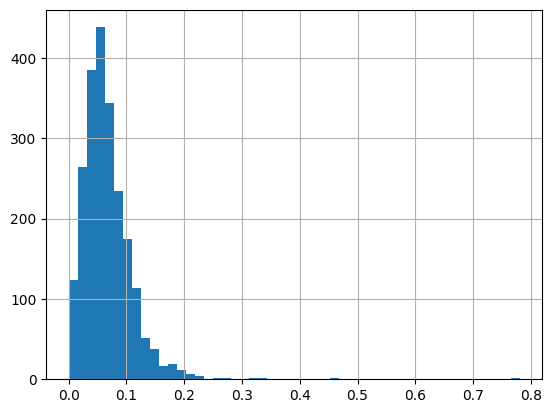

In [34]:
df['AmbuRatio'] = df['S1810_C02_047E'].astype(float) /df['S1810_C01_001E'].astype(float)
df['AmbuRatio'].hist(bins=50)

In [35]:


ambuLow = df['AmbuRatio'] <= df['AmbuRatio'].quantile(0.2)
ambuHigh = df['AmbuRatio'] > df['AmbuRatio'].quantile(0.8)

print('ambuLowArea')
ambuLowArea = getRatioSum(ambuLow, df)
print('ambuHighArea')
ambuHighArea = getRatioSum(ambuHigh, df)

print('High demand deprived area for elevators is much large, compared to area with elevators.')
print("it's n times large, n is following")
print(ambuHighArea['areaDeprivedSum']/ambuHighArea['areaElevatorSum'])

print('Low demand area for elevators is much large in ELEVATOR area, compared to DEPRIVED area with elevators.')
print("it's n times large, n is following")
print(ambuLowArea['areaElevatorSum']/ambuLowArea['areaDeprivedSum'])

ambuLowArea
The area in given condition is 18.54% in TOTAL area
The area in given condition is 19.62% in NORMAL area
The area in given condition is 23.67% in ELEVATOR area
The area in given condition is 16.42% in DEPRIVED area
{'areaTotalSum': 1312247054.0864, 'areaNormalSum': 556769199.808, 'areaElevatorSum': 319964608.10899997, 'areaDeprivedSum': 248642295.76399997}
ambuHighArea
The area in given condition is 19.35% in TOTAL area
The area in given condition is 20.71% in NORMAL area
The area in given condition is 20.62% in ELEVATOR area
The area in given condition is 21.30% in DEPRIVED area
{'areaTotalSum': 1369866271.382571, 'areaNormalSum': 587821855.993, 'areaElevatorSum': 278698484.57799995, 'areaDeprivedSum': 322667504.466}
High demand deprived area for elevators is much large, compared to area with elevators.
it's n times large, n is following
1.1577655506615945
Low demand area for elevators is much large in ELEVATOR area, compared to DEPRIVED area with elevators.
it's n times l

# Analyze for Race

In [36]:
df['nonWhiteDisabilityRatio'] =  1 - df['S1810_C02_011E'].astype(int) / df['S1810_C02_001E'].astype(int)
# S1810_C02_001E With a disability!!Total civilian noninstitutionalized population
# S1810_C02_011E	With a disability!!Total civilian noninstitutionalized population!!RACE AND HISPANIC OR LATINO ORIGIN!!White alone, not Hispanic or Latino
df.sort_values('nonWhiteDisabilityRatio',ascending=False).head()

,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,PUMA,Shape_Leng,Shape_Area,DepArea,NormalArea,ElevatorArea,GEO_ID_x,S1701_C01_001E,S1701_C01_013E,S1701_C01_014E,S1701_C01_015E,S1701_C01_016E,S1701_C01_017E,S1701_C01_018E,S1701_C01_019E,S1701_C01_020E,S1701_C01_021E,S1701_C01_022E,S1701_C01_023E,S1701_C01_024E,S1701_C01_025E,S1701_C01_026E,S1701_C01_038E,S1701_C01_039E,S1701_C01_040E,S1701_C01_041E,S1701_C01_042E,S1701_C01_043E,S1701_C01_044E,S1701_C01_045E,S1701_C02_001E,S1701_C02_013E,S1701_C02_014E,S1701_C02_015E,S1701_C02_016E,S1701_C02_017E,S1701_C02_018E,S1701_C02_019E,S1701_C02_020E,S1701_C02_021E,S1701_C02_022E,S1701_C02_023E,S1701_C02_024E,S1701_C02_025E,S1701_C02_026E,S1701_C02_038E,S1701_C02_039E,S1701_C02_040E,S1701_C02_041E,S1701_C02_042E,S1701_C02_043E,S1701_C02_044E,S1701_C02_045E,GEO_ID_y,S1901_C01_001E,S1901_C01_002E,S1901_C01_003E,S1901_C01_004E,S1901_C01_005E,S1901_C01_006E,S1901_C01_007E,S1901_C01_008E,S1901_C01_009E,S1901_C01_010E,S1901_C01_011E,S1901_C01_012E,S1901_C01_013E,GEO_ID,S1810_C01_001E,S1810_C01_004E,S1810_C01_005E,S1810_C01_006E,S1810_C01_007E,S1810_C01_008E,S1810_C01_009E,S1810_C01_010E,S1810_C01_011E,S1810_C01_012E,S1810_C01_013E,S1810_C01_014E,S1810_C01_015E,S1810_C01_016E,S1810_C01_017E,S1810_C01_018E,S1810_C01_019E,S1810_C01_029E,S1810_C01_039E,S1810_C01_047E,S1810_C01_048E,S1810_C01_049E,S1810_C01_050E,S1810_C01_051E,S1810_C01_052E,S1810_C01_053E,S1810_C01_054E,S1810_C01_055E,S1810_C01_063E,S1810_C02_001E,S1810_C02_004E,S1810_C02_005E,S1810_C02_006E,S1810_C02_007E,S1810_C02_008E,S1810_C02_009E,S1810_C02_010E,S1810_C02_011E,S1810_C02_012E,S1810_C02_019E,S1810_C02_029E,S1810_C02_039E,S1810_C02_047E,S1810_C02_048E,S1810_C02_049E,S1810_C02_050E,S1810_C02_051E,S1810_C02_052E,S1810_C02_053E,S1810_C02_054E,S1810_C02_055E,S1810_C02_063E,DepRatio,NormalRatio,ElevatorRatio,AmbuRatio,nonWhiteDisabilityRatio
1156,1208.010000,3.000000,Brooklyn,120801.000000,3120801.000000,NaN,East New York-City Line,BK0505,BK05,BK05 East New York-Cypress Hills (CD 5 Approximation),36047120801,4305.000000,6081.629908,2167971.933750,1284.561000,1650630.738000,1649346.176000,1400000US36047120801,5263,92,3734,0,771,0,88,578,601,74,3608,464,1663,698,783,850,1280,1726,1979,2080,2799,3393,4032,1028,13,918,0,94,0,0,3,38,13,677,17,308,54,298,(X),(X),(X),(X),(X),(X),(X),(X),1400000US36047120801,1432,16.8,2.0,4.0,6.4,15.4,11.2,5.7,19.3,7.3,11.9,57313,99530,1400000US36047120801,5308,92,3779,0,771,0,88,578,74,646,242,1132,1277,1791,415,451,NaN,NaN,NaN,NaN,1132,3068,1277,1791,866,415,451,NaN,NaN,529,0,389,0,9,0,0,131,0,3,78,42,134,458,0,195,0,195,263,23,240,278,424,0.000593,0.761371,0.760778,0.086285,1.000000
1150,1192.000000,3.000000,Brooklyn,119200.000000,3119200.000000,NaN,East New York (North),BK0502,BK05,BK05 East New York-Cypress Hills (CD 5 Approximation),36047119200,4305.000000,6364.190569,2421479.274670,550359.959000,2421479.275000,1871119.316000,1400000US36047119200,4014,684,1554,0,118,0,1214,444,1822,76,2300,244,1385,341,330,385,991,1092,1210,1210,2321,2884,3624,765,75,384,0,15,0,266,25,341,0,400,4,357,0,39,(X),(X),(X),(X),(X),(X),(X),(X),1400000US36047119200,1153,9.8,8.8,12.0,7.7,1.9,7.3,12.2,32.4,5.1,2.7,85250,76528,1400000US36047119200,4014,684,1554,0,118,0,1214,444,76,1822,536,688,1039,1390,254,107,NaN,NaN,NaN,NaN,688,2429,1039,1390,361,254,107,NaN,NaN,346,75,140,0,27,0,104,0,0,179,59,121,81,166,0,51,0,51,115,32,83,101,194,0.227283,1.000000,0.772717,0.041355,1.000000
1154,1200.000000,3.000000,Brooklyn,120000.000000,3120000.000000,NaN,East New York-City Line,BK0505,BK05,BK05 East New York-Cypress Hills (CD 5 Approximation),36047120000,4305.000000,6327.943120,1623804.089290,31376.482000,1623804.089000,1592427.608000,1400000US36047120000,2697,111,1265,0,1113,22,49,137,213,29,1822,210,1037,247,328,359,567,722,817,1267,1558,1835,2142,535,70,127,0,188,22,23,105,94,19,335,57,208,33,37,(X),(X),(X),(X),(X),(X),(X),(X),1400000US36047120000,969,0.0,7.1,3.7,30.3,14.6,12.5,4.7,11.9,1

In [37]:
# These findings looks not new
nonWhiteDisabilityLow = df['nonWhiteDisabilityRatio'] <= df['nonWhiteDisabilityRatio'].quantile(0.2)
nonWhiteDisabilityHigh = df['nonWhiteDisabilityRatio'] > df['nonWhiteDisabilityRatio'].quantile(0.8)
print('nonWhiteDisabilityLowArea, meaning high white people')
nonWhiteDisabilityLowArea = getRatioSum(nonWhiteDisabilityLow, df)
print('nonWhiteDisabilityHighArea')
nonWhiteDisabilityHighArea = getRatioSum(nonWhiteDisabilityHigh, df)

nonWhiteDisabilityLowArea, meaning high white people
The area in given condition is 26.85% in TOTAL area
The area in given condition is 22.74% in NORMAL area
The area in given condition is 22.48% in ELEVATOR area
The area in given condition is 22.61% in DEPRIVED area
{'areaTotalSum': 1900540512.815874, 'areaNormalSum': 645368033.175, 'areaElevatorSum': 303915423.838, 'areaDeprivedSum': 342479633.564}
nonWhiteDisabilityHighArea
The area in given condition is 14.66% in TOTAL area
The area in given condition is 16.02% in NORMAL area
The area in given condition is 16.55% in ELEVATOR area
The area in given condition is 15.98% in DEPRIVED area
{'areaTotalSum': 1037695524.9009391, 'areaNormalSum': 454521751.689, 'areaElevatorSum': 223766938.908, 'areaDeprivedSum': 242024949.635}


# focus on Manhattan 

In [38]:
df['nonWhiteDisabilityRatio'] =  1 - df['S1810_C02_011E'].astype(int) / df['S1810_C02_001E'].astype(int)

manhattan_df = df[df['BoroName'] == "Manhattan"]



nonWhiteDisabilityLow = manhattan_df['nonWhiteDisabilityRatio'] <= 0.3
nonWhiteDisabilityHigh = manhattan_df['nonWhiteDisabilityRatio'] > 0.7

print('nonWhiteDisabilityLowArea, meaning high white people')
nonWhiteDisabilityLowArea = getRatioSum(nonWhiteDisabilityLow, manhattan_df)
print('nonWhiteDisabilityHighArea')
nonWhiteDisabilityHighArea = getRatioSum(nonWhiteDisabilityHigh, manhattan_df)

ManhattanNonWhitePopulationRatio = 1- manhattan_df['S1810_C02_011E'].astype(int).sum() / manhattan_df['S1810_C02_001E'].astype(int).sum()
print('ManhattanNonWhitePopulationRatio is', ManhattanNonWhitePopulationRatio)

nonWhiteDisabilityLowArea, meaning high white people
The area in given condition is 28.97% in TOTAL area
The area in given condition is 29.58% in NORMAL area
The area in given condition is 34.84% in ELEVATOR area
The area in given condition is 14.21% in DEPRIVED area
{'areaTotalSum': 156624554.946035, 'areaNormalSum': 141935577.99699998, 'areaElevatorSum': 123777886.342, 'areaDeprivedSum': 18175145.037}
nonWhiteDisabilityHighArea
The area in given condition is 41.67% in TOTAL area
The area in given condition is 41.52% in NORMAL area
The area in given condition is 32.54% in ELEVATOR area
The area in given condition is 67.93% in DEPRIVED area
{'areaTotalSum': 225305718.69683304, 'areaNormalSum': 199214926.25999996, 'areaElevatorSum': 115594627.35999998, 'areaDeprivedSum': 86852342.3}
ManhattanNonWhitePopulationRatio is 0.677259344774825


In [39]:
##Debug for the below code, why not 1???######################
(nonWhiteDisabilityHighArea['areaTotalSum'] + nonWhiteDisabilityLowArea['areaTotalSum'])/totalAreaSum # 0.9693268855774144

nonWhiteDisabilityLow = df['nonWhiteDisabilityRatio'] <= 0.3
nonWhiteDisabilityHigh = df['nonWhiteDisabilityRatio'] > 0.7

tempWhiteLow = df[nonWhiteDisabilityLow]['Shape_Area']
tempWhiteHigh = df[nonWhiteDisabilityHigh]['Shape_Area']
tempSum = df[nonWhiteDisabilityLow]['Shape_Area'].sum() + df[nonWhiteDisabilityHigh]['Shape_Area'].sum()
print('tempSum / totalAreaSum =', tempSum / totalAreaSum)

tempNaN = df[df['nonWhiteDisabilityRatio'].isna()]
tempNaNArea = tempNaN['Shape_Area'].sum()

print('Check if NanArea + SumConditonalArea = ', (tempNaNArea + tempSum)/totalAreaSum)
print('NaN broke the calculation:its number is', len(tempNaN))


importantColumns = ['S1901_C01_001E', 'S1810_C02_001E', 'S1810_C02_011E', 'nonWhiteDisabilityRatio']
tempNaN[importantColumns].sort_values(by='S1901_C01_001E')

# There are 15 cases where 0 devided 0. Ignore these execeptions.

tempSum / totalAreaSum = 0.6687162823606969
Check if NanArea + SumConditonalArea =  0.6993893967832825
NaN broke the calculation:its number is 15


,S1901_C01_001E,S1810_C02_001E,S1810_C02_011E,nonWhiteDisabilityRatio
1919,14,0,0,NaN
2208,193,0,0,NaN
209,23,0,0,NaN
2236,23,0,0,NaN
2240,29,0,0,NaN
1022,3,0,0,NaN
1262,36,0,0,NaN
403,37,0,0,NaN
1615,4,0,0,NaN
1872,51,0,0,NaN


In [40]:
# Due to time, I skip this. I never use these findings


df['blackDisabilityRatio'] =  df['S1701_C02_014E'].astype(int) / df['S1810_C02_001E'].astype(int)
# S1810_C02_001E With a disability!!Total civilian noninstitutionalized population
# S1810_C02_005E	With a disability!!Total civilian noninstitutionalized population!!RACE AND HISPANIC OR LATINO ORIGIN!!Black or African American alone

In [41]:
# Due to time, I skip this. I never use these findings

blackDisabilityLow = df['blackDisabilityRatio'] <= 0.1
blackDisabilityHigh = df['blackDisabilityRatio'] > 0.3
print('blackDisabilityLowArea')
blackDisabilityLowArea = getRatioSum(blackDisabilityLow, df)
# print(blackDisabilityLowArea['areaElevatorSum']/blackDisabilityLowArea['areaNormalSum'])

print('blackDisabilityHighArea')
blackDisabilityHighArea = getRatioSum(blackDisabilityHigh, df)

# print('In ELEVATOR area, white area is 47.74%, on the other hand non-white area is 33.86%')
df['blackDisabilityRatio'].quantile(0.7)

df['blackDisabilityRatio'].sort_values(ascending=False)

blackDisabilityLowArea
The area in given condition is 52.80% in TOTAL area
The area in given condition is 45.43% in NORMAL area
The area in given condition is 41.98% in ELEVATOR area
The area in given condition is 47.80% in DEPRIVED area
{'areaTotalSum': 3737561359.340776, 'areaNormalSum': 1289026070.612, 'areaElevatorSum': 567470977.792, 'areaDeprivedSum': 723962149.4920001}
blackDisabilityHighArea
The area in given condition is 30.58% in TOTAL area
The area in given condition is 38.69% in NORMAL area
The area in given condition is 39.68% in ELEVATOR area
The area in given condition is 37.70% in DEPRIVED area
{'areaTotalSum': 2164424200.378749, 'areaNormalSum': 1098026648.835, 'areaElevatorSum': 536376688.728, 'areaDeprivedSum': 571049207.4319999}


1615        inf
1621        inf
1641        inf
1435   5.687500
1046   4.938776
         ...   
1919        NaN
2208        NaN
2236        NaN
2240        NaN
2301        NaN
Name: blackDisabilityRatio, Length: 2231, dtype: float64

# Poverty

<Axes: >

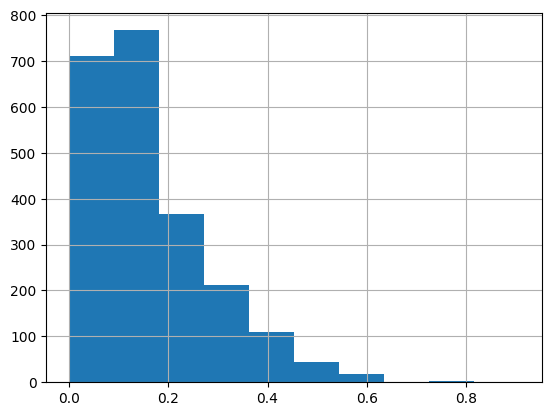

In [42]:
df['povertyRatio'] = df['S1701_C02_001E'].astype(float) / df['S1701_C01_001E'].astype(float)
# S1701_C01_001E	Total!!Population for whom poverty status is determined
# S1701_C02_001E	Below poverty level!!Population for whom poverty status is determined
df['povertyRatio'].hist()

In [43]:
# povertyLow = df['povertyRatio'] <= df['povertyRatio'].quantile(0.1)
# povertyHigh = df['povertyRatio'] > df['povertyRatio'].quantile(0.9)

# print("df['povertyRatio'].quantile(0.2)", df['povertyRatio'].quantile(0.1))
# print("df['povertyRatio'].quantile(0.8)", df['povertyRatio'].quantile(0.9))


povertyLow = df['povertyRatio'] <= 0.05
povertyHigh = df['povertyRatio'] > 0.1



print('povertyLowArea')
ambuLowArea = getRatioSum(povertyLow, df)
print('povertyHighArea')
ambuHighArea = getRatioSum(povertyHigh, df)

# print('High demand deprived area for elevators is much large, compared to area with elevators.')
# print("it's n times large, n is following")
# print(ambuHighArea['areaDeprivedSum']/ambuHighArea['areaElevatorSum'])

# print('Low demand area for elevators is much large in ELEVATOR area, compared to DEPRIVED area with elevators.')
# print("it's n times large, n is following")
# print(ambuLowArea['areaElevatorSum']/ambuLowArea['areaDeprivedSum'])



povertyLowArea
The area in given condition is 18.94% in TOTAL area
The area in given condition is 9.41% in NORMAL area
The area in given condition is 10.09% in ELEVATOR area
The area in given condition is 8.85% in DEPRIVED area
{'areaTotalSum': 1340877754.8562, 'areaNormalSum': 266952728.876, 'areaElevatorSum': 136402419.158, 'areaDeprivedSum': 134053328.709}
povertyHighArea
The area in given condition is 52.60% in TOTAL area
The area in given condition is 68.32% in NORMAL area
The area in given condition is 65.92% in ELEVATOR area
The area in given condition is 70.26% in DEPRIVED area
{'areaTotalSum': 3723607342.12387, 'areaNormalSum': 1938676785.2159998, 'areaElevatorSum': 891084865.962, 'areaDeprivedSum': 1064144040.0639999}


In [46]:
write_columns = ['GEOID', 'AmbuRatio', 'nonWhiteDisabilityRatio', 'povertyRatio']

In [44]:
# # Drop 25 Empty or Useless columns 
# S1701_C02_038E	S1701_C02_039E	S1701_C02_040E	S1701_C02_041E	S1701_C02_042E	S1701_C02_043E	S1701_C02_044E	S1701_C02_045E
# S1810_C01_019E	S1810_C01_029E	S1810_C01_039E	S1810_C01_047E
# S1810_C01_055E	S1810_C01_063E

# CTLabel	BoroCode CT2020	BoroCT2020	CDEligibil NTA2020	CDTA2020	CDTANAME PUMA

# GEO_ID_y
# GEO_ID_x


# Output

In [47]:
# CSV保存、日時を追加
from datetime import datetime

# 現在の日時を取得し、フォーマットを指定
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")

# ファイル名に日時を追加
file_name = f'output_{current_time}.csv'

# CSVファイルとして保存
df.to_csv(file_name, index=False, columns=write_columns)

print(f"Data saved to {file_name}")

Data saved to output_20240706_232957.csv
